In [39]:
from functions import *
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
from optparse import OptionParser
import matplotlib
matplotlib.use('Agg')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping

%matplotlib inline

n_iter = 200
fitness_potential={}
predicted={}
true={}

for chunk in ['S7']:
    
    print (chunk)
    data, labels, unique_mutations[chunk], aa_seq, mut_list = read_data_all_positions(chunk)

    print 'Splitting the data'
    x_train, x_valid, y_train, y_valid = train_test_split(data, labels, test_size = 0.05)
    
    it=0
    iterations=1
    while it<iterations and iterations<100:
        print it
        model = Sequential()

        model.add(Dense(2,input_dim=data.shape[1],activation='sigmoid',kernel_initializer='glorot_normal'))
        model.add(Dense(10,activation='sigmoid'))
        model.add(Dense(1,activation='relu'))

        opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

        early_stopping_monitor=EarlyStopping(patience=240)

        model.compile(optimizer=opt,
                      loss='mean_squared_error')

        hist = model.fit(x_train, y_train, validation_data=[x_valid, y_valid], 
                                epochs=n_iter, batch_size=500, shuffle=True, callbacks=[early_stopping_monitor],verbose=1)

        proba = model.predict_proba(data, batch_size=500,verbose=0)
        predicted[chunk] = proba.flatten()
        true[chunk] = labels
        
        if mean_squared_error(true[chunk],predicted[chunk])>0.2:
            iterations+=1
            
        weights = model.layers[0].get_weights()[0]
        biases = model.layers[0].get_weights()[1]

        fitness_potential[chunk] = data.dot(weights) + biases
        
        it+=1

S7
Splitting the data
0
Train on 4097 samples, validate on 216 samples
Epoch 1/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 2/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 3/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 4/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 5/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 6/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 7/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 8/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 9/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 10/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_l

4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 87/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 88/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 89/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 90/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 91/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 92/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 93/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 94/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 95/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 96/200
4097/4097 [==============================] - 0s - 

4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 172/200
4097/4097 [==============================] - ETA: 0s - loss: 0.688 - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 173/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 174/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 175/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 176/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 177/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 178/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 179/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 180/200
4097/4097 [==============================] - 0s - loss: 0.6874 - val_loss: 0.7493
Epoch 181/200
4097/4097 [=====

4097/4097 [==============================] - 0s - loss: 0.0101 - val_loss: 0.0140
Epoch 57/200
4097/4097 [==============================] - 0s - loss: 0.0082 - val_loss: 0.0089
Epoch 58/200
4097/4097 [==============================] - 0s - loss: 0.0113 - val_loss: 0.0075
Epoch 59/200
4097/4097 [==============================] - 0s - loss: 0.0081 - val_loss: 0.0121
Epoch 60/200
4097/4097 [==============================] - 0s - loss: 0.0095 - val_loss: 0.0101
Epoch 61/200
4097/4097 [==============================] - 0s - loss: 0.0085 - val_loss: 0.0073
Epoch 62/200
4097/4097 [==============================] - 0s - loss: 0.0113 - val_loss: 0.0074
Epoch 63/200
4097/4097 [==============================] - 0s - loss: 0.0067 - val_loss: 0.0276
Epoch 64/200
4097/4097 [==============================] - 0s - loss: 0.0106 - val_loss: 0.0080
Epoch 65/200
4097/4097 [==============================] - 0s - loss: 0.0091 - val_loss: 0.0096
Epoch 66/200
4097/4097 [==============================] - 0s - 

4097/4097 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0033
Epoch 142/200
4097/4097 [==============================] - 0s - loss: 0.0084 - val_loss: 0.0062
Epoch 143/200
4097/4097 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0097
Epoch 144/200
4097/4097 [==============================] - 0s - loss: 0.0072 - val_loss: 0.0038
Epoch 145/200
4097/4097 [==============================] - 0s - loss: 0.0072 - val_loss: 0.0104
Epoch 146/200
4097/4097 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0042
Epoch 147/200
4097/4097 [==============================] - 0s - loss: 0.0083 - val_loss: 0.0085
Epoch 148/200
4097/4097 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0035
Epoch 149/200
4097/4097 [==============================] - 0s - loss: 0.0070 - val_loss: 0.0097
Epoch 150/200
4097/4097 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0040
Epoch 151/200
4097/4097 [=============================

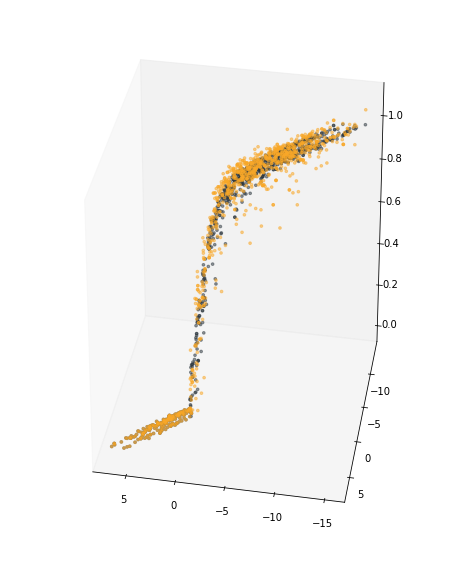

In [45]:
fig = plt.figure(figsize=[8,10])
ax = fig.add_subplot(111, projection='3d')
inds=np.random.choice([x for x in range(len(fitness_potential[chunk]))],size=1000)

X = -1*fitness_potential[chunk][:,0][inds]
Y = -1*fitness_potential[chunk][:,1][inds]
Z1 = true[chunk][inds]
Z2 = predicted[chunk][inds]

ax.scatter(X, Y, Z1, color='#F9A828', alpha=0.5, label='True', s=7)
ax.scatter(X, Y, Z2, color='#2E383F', alpha=0.5, label='Predicted', s=7)
ax.grid(False)
# plt.title('Segment '+chunk[1:],fontsize=20)
ax.view_init(30, 100)
plt.savefig('../tmp/3d_'+chunk+'.pdf')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


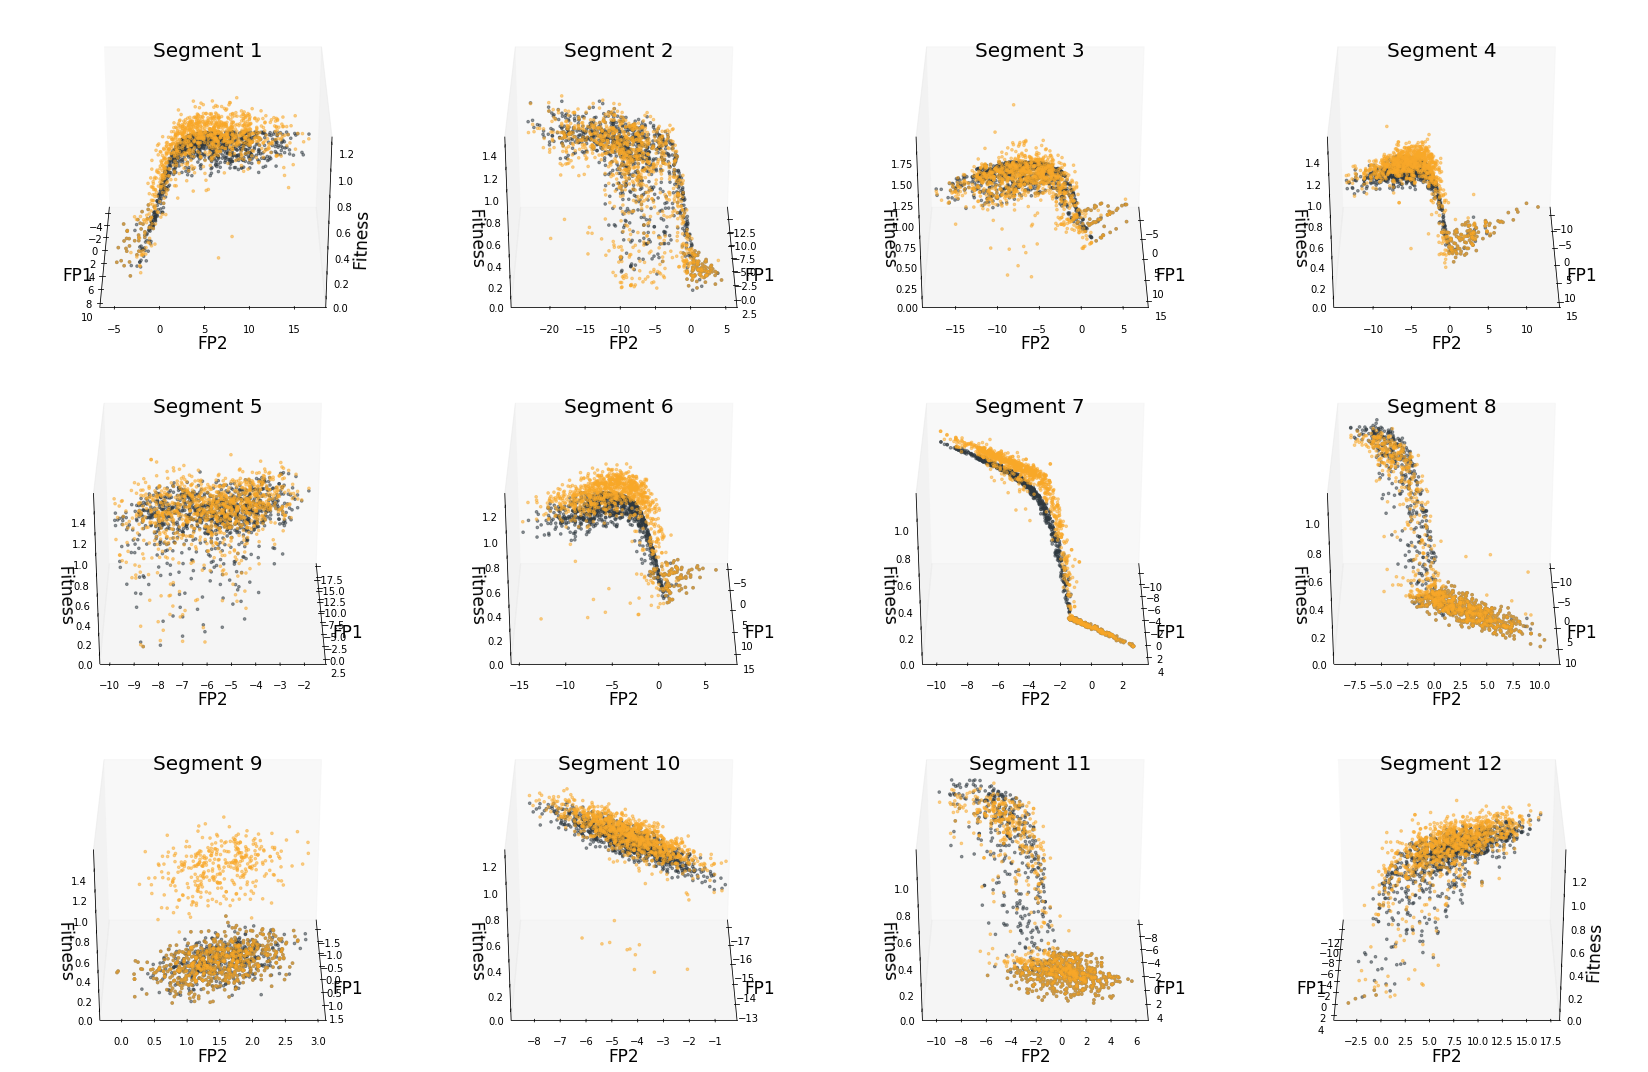

In [149]:
inds={}

for chunk in chunks:
    inds[chunk]=np.random.choice([x for x in range(len(fitness_potential[chunk]))],size=1000)

fig=plt.figure(figsize=(4*5+3,3*5))

for angle in range(0, 361, 10):
    print angle
    count=1
    for chunk in chunks:

        ax=plt.subplot(3,4, count, projection='3d')
        plt.tight_layout()
        plt.title(chunk,fontsize=20)

        X = fitness_potential[chunk][:,0][inds[chunk]]
        Y = fitness_potential[chunk][:,1][inds[chunk]]
        Z1 = true[chunk][inds[chunk]]
        Z2 = predicted[chunk][inds[chunk]]


        ax.scatter(X, Y, Z1, color='#F9A828', alpha=0.5, label='True', s=7)
        ax.scatter(X, Y, Z2, color='#2E383F', alpha=0.5, label='Predicted', s=7)
        plt.xlabel('FP1',fontsize=17)
        plt.ylabel('FP2',fontsize=17)
        ax.set_zlabel('Fitness',fontsize=17)
        ax.grid(False)
        plt.title('Segment '+chunk[1:],fontsize=20)
        ax.view_init(30, angle)
        plt.draw()
        count+=1
        
    plt.savefig('../3d/'+str(angle)+'.png')

In [17]:
one_curve=[]

for i in [np.where((fp[:,0]<0)&(fp[:,1]>0))][0][0]:
    for mut in mut_list[i].split(':'):
        one_curve.append(mut)
        
for i in [np.where((fp[:,0]>0)&(fp[:,1]>5))][0][0]:
    for mut in mut_list[i].split(':'):
        one_curve.append(mut)

In [22]:
other_curve=[]

for i in [np.where((fp[:,0]<0)&(fp[:,1]<-1))][0][0]:
    for mut in mut_list[i].split(':'):
        other_curve.append(mut)
        
for i in [np.where((fp[:,0]>0)&(fp[:,1]<5))][0][0]:
    for mut in mut_list[i].split(':'):
        other_curve.append(mut)

In [26]:
other_curve_dict=FreqDist(other_curve)
one_curve_dict=FreqDist(one_curve)

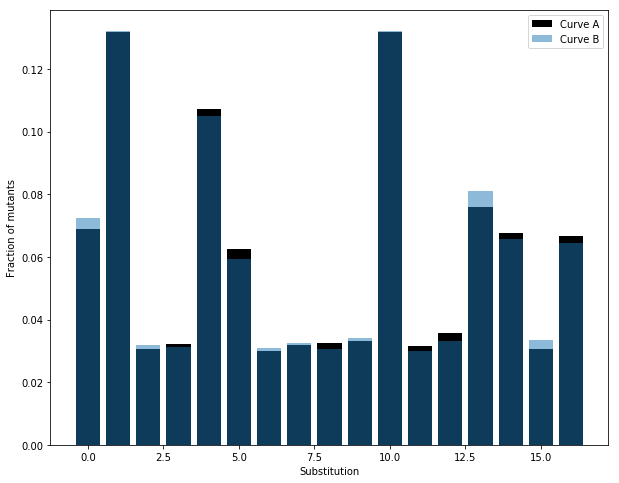

In [40]:
plt.figure(figsize=[10,8])
plt.bar([x for x in range(len(one_curve_dict.keys()))],[x*1./sum(one_curve_dict.values()) for x in one_curve_dict.values()],color='black',label='Curve A')
plt.bar([x for x in range(len(other_curve_dict.keys()))],[x*1./sum(other_curve_dict.values()) for x in other_curve_dict.values()],alpha=0.5,label='Curve B')
plt.legend()
plt.xlabel('Substitution')
plt.ylabel('Fraction of mutants')


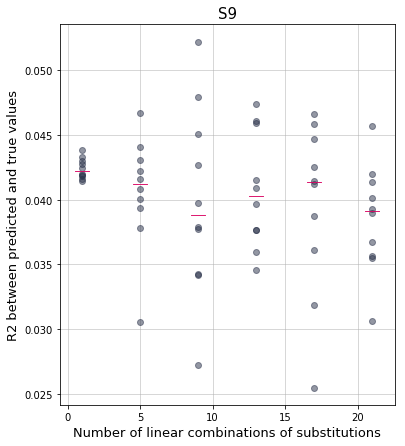

In [21]:

plt.figure(figsize=[6,7])
for i,r_list in enumerate(r_val):
    plt.plot([i*4+1]*len(r_list),[float(x)**2 for x in r_list],'o',alpha=0.5,color='#283149')
    plt.plot([i*4+0.5,i*4+1.5],[np.median([float(x)**2 for x in r_list])]*2,'-',lw=0.9,color='#DA0463')
plt.grid('--k',lw=0.5)
plt.title(chunk,fontsize=15)
plt.ylabel('R2 between predicted and true values',fontsize=13)
plt.xlabel('Number of linear combinations of substitutions',fontsize=13)
plt.savefig('/nfs/scistore08/kondrgrp/eputints/Jupyter/HIS3InterspeciesEpistasis/Analysis/Katya/NN/complexity/20_iterations/r_'+chunk+'.pdf')

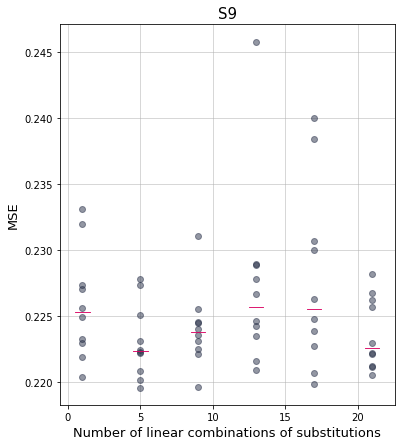

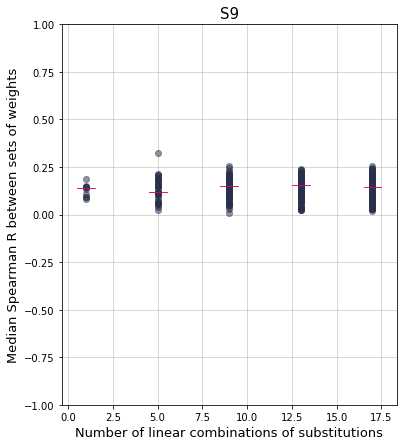

In [22]:
plt.figure(figsize=[6,7])
for i,mse_list in enumerate(mse_val):
    plt.plot([i*4+1]*len(mse_list),mse_list,'o',alpha=0.5,color='#283149')
    plt.plot([i*4+0.5,i*4+1.5],[np.median(mse_list)]*2,'-',lw=0.9,color='#DA0463')
plt.grid('--k',lw=0.5)
plt.title(chunk,fontsize=15)
plt.ylabel('MSE',fontsize=13)
plt.xlabel('Number of linear combinations of substitutions',fontsize=13)
plt.savefig('/nfs/scistore08/kondrgrp/eputints/Jupyter/HIS3InterspeciesEpistasis/Analysis/Katya/NN/complexity/20_iterations/mse_'+chunk+'.pdf')

plt.figure(figsize=[6,7])
for i,r2_list in enumerate(r2_weights):
    plt.plot([i*4+1]*len(r2_list),r2_list,'o',alpha=0.5,color='#283149')
    plt.plot([i*4+0.5,i*4+1.5],[np.median(r2_list)]*2,'-',lw=0.9,color='#DA0463')
plt.ylim(-1,1)
plt.title(chunk,fontsize=15)
plt.grid('--k',lw=0.5)
plt.ylabel('Median Spearman R between sets of weights',fontsize=13)
plt.xlabel('Number of linear combinations of substitutions',fontsize=13)
plt.savefig('/nfs/scistore08/kondrgrp/eputints/Jupyter/HIS3InterspeciesEpistasis/Analysis/Katya/NN/complexity/20_iterations/r2_weights_'+chunk+'.pdf')

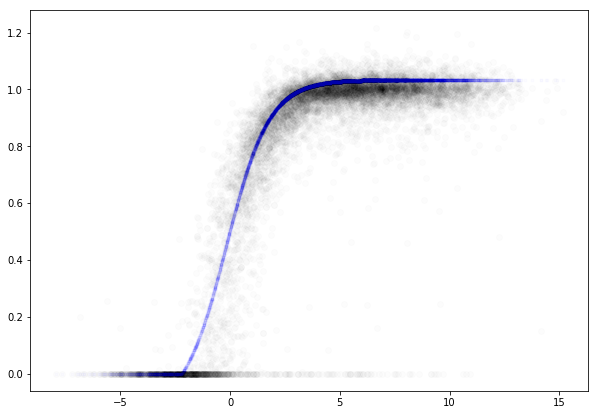

In [52]:
fitness_potential = x_train.dot(weights)+biases
plt.figure(figsize = [10,7])
plt.plot(fitness_potential[:10000], y_train[:10000], 'ok', alpha = 0.01);
plt.plot(fitness_potential[:10000], predicted_train[:10000], '.b', alpha = 0.01);

In [48]:
x=[]
y=[]
for i,l in enumerate(mse_val):

        x.extend([i*3+1]*len(l))
        y.extend(l)

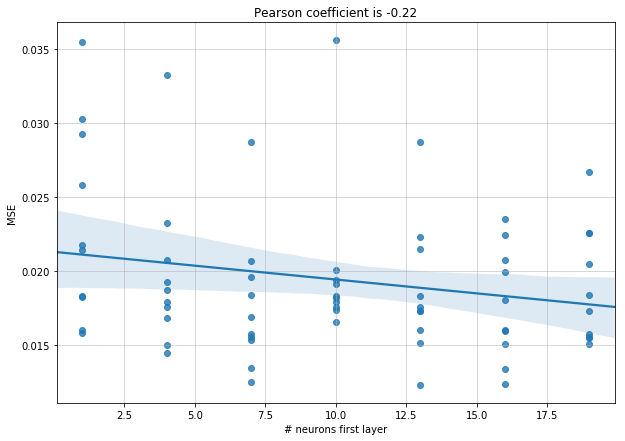

In [49]:
plt.figure(figsize=[10,7])
sns.regplot(x=np.array(x), y=np.array(y))
plt.grid('--k',lw=.5)
plt.ylabel('MSE')
plt.xlabel('# neurons first layer')
plt.title('Pearson coefficient is %.2f' % pearsonr(x,y)[0])